In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os
import itertools

In [11]:
# gets the last created filename (which is the latest dataset)
directory = os.path.dirname('/Users/css/dev/thesis/selfish_mining_abm/output/scatter_data/')

# fnames = [
#     "/scatterplot_alpha_0.2_gamma_0.01.csv",
#     "/scatterplot_alpha_0.2_gamma_0.1.csv",
#     "/scatterplot_alpha_0.2_gamma_1.csv",
#     "/scatterplot_alpha_0.4_gamma_0.01.csv",
#     "/scatterplot_alpha_0.4_gamma_0.01.csv",
#     "/scatterplot_alpha_0.4_gamma_1.csv"]

fnames = os.listdir('/Users/css/dev/thesis/selfish_mining_abm/output/scatter_data')
fnames = ["/"+f for f in fnames if f.lower().endswith(".csv")]

In [12]:
fnames

['/scatterplot_alpha_0.4_gamma_0.14.csv',
 '/scatterplot_alpha_0.2_gamma_0.14.csv',
 '/scatterplot_alpha_0.2_gamma_1.58.csv',
 '/scatterplot_alpha_0.4_gamma_1.58.csv',
 '/scatterplot_alpha_0.2_gamma_17.78.csv',
 '/scatterplot_alpha_0.4_gamma_17.78.csv']

In [13]:
dfs = []
for fname in fnames:
     df = pd.read_csv(directory+fname)
     dfs.append(df)

In [14]:
dfs[0].head()

,Unnamed: 0,node,selfish,hashing power,total blocks,mainchain blocks,orphan blocks,alpha,gamma,time
0,0,0,0.0,0.000138,0,0,0,0.4,0.14,10000
1,1,1,0.0,0.006514,6,4,2,0.4,0.14,10000
2,2,2,0.0,0.007981,7,6,1,0.4,0.14,10000
3,3,3,0.0,0.009177,7,6,1,0.4,0.14,10000
4,4,4,1.0,0.010467,5,4,1,0.4,0.14,10000


### Plot fraction of blocks produced by a node as a function of the hashing power of that node

In [15]:
dfs[2]

,Unnamed: 0,node,selfish,hashing power,total blocks,mainchain blocks,orphan blocks,alpha,gamma,time
0,0,0,0.0,0.015461,19,5,14,0.2,1.58,10000
1,1,1,1.0,0.000104,0,0,0,0.2,1.58,10000
2,2,2,0.0,0.003267,1,1,0,0.2,1.58,10000
3,3,3,0.0,0.001387,0,0,0,0.2,1.58,10000
4,4,4,0.0,0.015517,23,14,9,0.2,1.58,10000
...,...,...,...,...,...,...,...,...,...,...
115,115,115,0.0,0.002623,2,1,1,0.2,1.58,10000
116,116,116,1.0,0.014000,13,7,6,0.2,1.58,10000
117,117,117,0.0,0.004490,3,2,1,0.2,1.58,10000
118,118,118,0.0,0.000959,1,0,1,0.2,1.58,10000


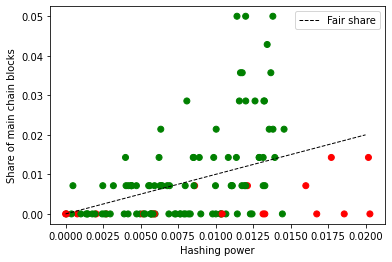

In [22]:
index = 4

total = sum(dfs[index]["mainchain blocks"])
is_selfish = list(dfs[index]["selfish"])
color_vector = ["red" if i==True else "green" for i in is_selfish ]

plt.scatter(
    dfs[index]["hashing power"],
    dfs[index]["mainchain blocks"] / total,
    color=color_vector
)
plt.plot(
    [0, 0.02],
    [0, 0.02],
    label="Fair share",
    color="black",
    linestyle="--",
    linewidth=1.0,
)
# plt.xlim(0, 0.015)
# plt.ylim(0,0.02)
plt.xlabel("Hashing power")
plt.ylabel("Share of main chain blocks")
# plt.xscale("log")
# plt.yscale("log")
plt.legend()
plt.show()